# Check probe

# Setup

Setup Jupyter notebook's kernel based on python env setup with `requirements_silico.txt` (see comments in file for setup)

In [3]:
# SETUP PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pprint as pp
import pandas as pd
import yaml
import numpy as np
import shutil
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.widgets as sw
import spikeinterface.postprocessing as spost
from spikeinterface.comparison import GroundTruthStudy
from probeinterface.plotting import plot_probe
import json 
from datetime import datetime

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"

os.chdir(PROJ_PATH)
from src.nodes.io.silico import loading_raw_recording
from src.nodes.io.silico.loading import load_campaign_params
from src.nodes.truth.silico import ground_truth
from src.nodes.prepro import preprocess
from src.nodes.postpro import waveform
from src.nodes.utils import get_config, write_metadata

# SET PARAMETERS
EXPERIMENT = "supp/silico_reyes"    # specifies the experiment 
SIMULATION_DATE = "2023_01_13" # specifies the run (date)


# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# set output figure paths
FIG_PATH = data_conf["figures"]["silico"]["probe"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-02-09 17:56:44,640 - root - utils.py - get_config - INFO - Reading experiment config.
2023-02-09 17:56:44,657 - root - utils.py - get_config - INFO - Reading experiment config. - done


# Plot probe

**Probe description**

In [4]:
# load the raw lfp recording (slow)
trace = loading_raw_recording.load(data_conf, param_conf)

# check the probe channels' locations
probe = trace.get_probe()
print(probe)
print("Probe coordinates and parameters:")
probe.to_dataframe()

Probe - 128ch - 1shanks
Probe coordinates and parameters:


,x,y,z,contact_shapes,radius,shank_ids,contact_ids
0,3333.812424,-1841.700930,-2941.781313,circle,10.0,,
1,3378.990145,-1853.023930,-2882.995573,circle,10.0,,
2,3424.167866,-1864.346930,-2824.209833,circle,10.0,,
3,3469.345587,-1875.669930,-2765.424093,circle,10.0,,
4,3514.523308,-1886.992930,-2706.638353,circle,10.0,,
...,...,...,...,...,...,...,...
123,4171.125433,-608.256736,-2295.138175,circle,10.0,,
124,4216.303153,-619.579736,-2236.352435,circle,10.0,,
125,4261.480874,-630.902736,-2177.566695,circle,10.0,,
126,4306.658595,-642.225736,-2118.780955,circle,10.0,,


**Plot**

```diff
- Result: The wiring of the contacts and device channels is correct
```

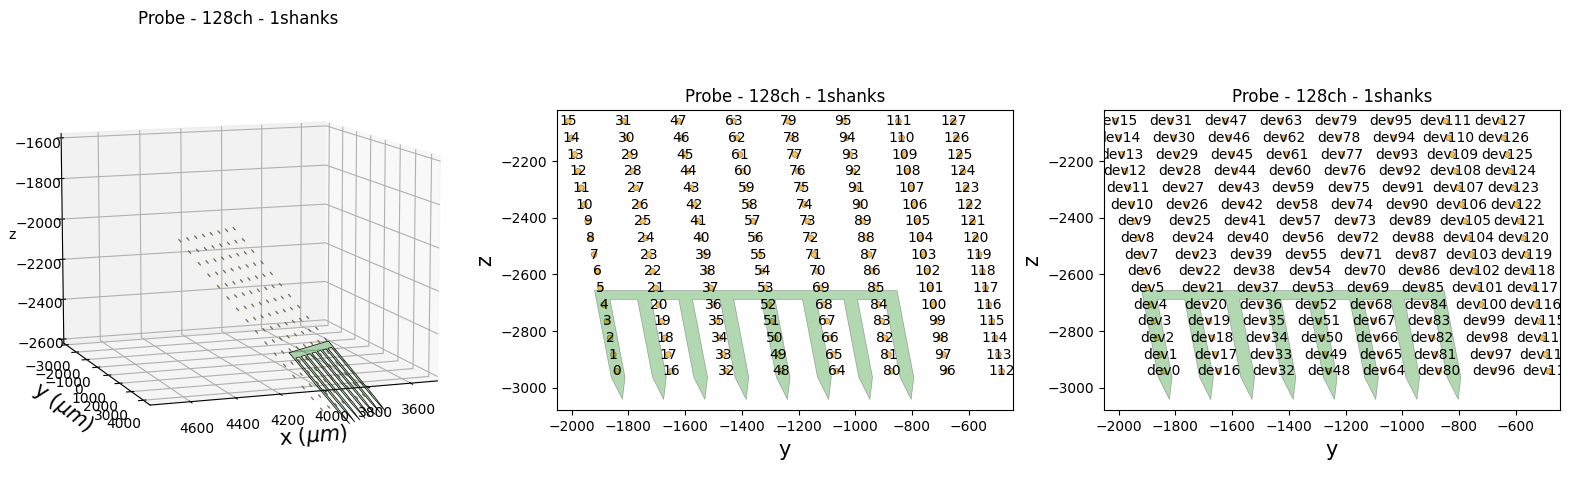

In [5]:
# View in contact channe locations in 3D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(131, projection="3d")
ax.view_init(10, 70)
plot_probe(probe, ax=ax)
ax.set_xlim([3500, 4750])
ax.set_zlim([-2600, -1600])

# plot channel id on projection to the y-z 2D plan
ax = fig.add_subplot(132)
plot_probe(probe.to_2d(axes="yz"), ax=ax, with_channel_index=True)
ax.set_xlabel("y")
ax.set_ylabel("z")

# plot channel id on the device
ax = fig.add_subplot(133)
plot_probe(probe.to_2d(axes="yz"), ax=ax, with_device_index=True)
ax.set_xlabel("y")
ax.set_ylabel("z")

In [6]:
# save figure
fig.savefig(FIG_PATH + ".png")

# write metadata
metadata = {
    "fig_path": FIG_PATH,
    "creation_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
    "simulation_date": SIMULATION_DATE,
    "data_conf": data_conf,
    "param_conf": param_conf,
}
write_metadata(metadata, FIG_PATH)

# References

(1) https://probeinterface.readthedocs.io/en/stable/examples/ex_05_device_channel_indices.html 

(2) https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html 